In [7]:
%tensorflow_version 1.x

In [8]:
import tensorflow as tf

In [9]:
tf.__version__

'1.15.2'

In [3]:
!pip install TFANN


  Created wheel for TFANN: filename=TFANN-1.0.1-py3-none-any.whl size=7537 sha256=a9c8fb05356e900fb6f027d2b34e0215c0d7c01072d4821424877c39df356ee9
  Stored in directory: /root/.cache/pip/wheels/63/c4/f0/02db7f8c1bef031e5206494205bfdd7eb9ff3679600399f8c0
Successfully built TFANN


In [15]:
import numpy as np
import matplotlib.pyplot as mpl
from sklearn.preprocessing import scale
from TFANN import ANNR
from google.colab import files
from scipy import stats


In [5]:
files.upload()


Saving SBER.ME.csv to SBER.ME.csv


{'SBER.ME.csv': b'Date;Date Value;Open;High;Low;Close;Adj Close;Volume\r\n07.11.2016;42681;143.800003;144.880005;142.550003;143.399994;86.384933;32443575\r\n08.11.2016;42682;144.250000;146.330002;143.679993;146.110001;88.017479;37347740\r\n09.11.2016;42683;143.000000;151.350006;142.500000;151.039993;90.987328;102394660\r\n10.11.2016;42684;151.880005;155.570007;151.839996;153.360001;92.384911;100426421\r\n11.11.2016;42685;153.000000;153.679993;151.440002;151.509995;91.270454;69515020\r\n14.11.2016;42688;152.500000;152.850006;149.169998;150.399994;90.601799;47655170\r\n15.11.2016;42689;151.000000;152.369995;148.750000;149.850006;90.270470;50518750\r\n16.11.2016;42690;150.899994;151.880005;149.179993;149.940002;90.324677;35759620\r\n17.11.2016;42691;149.929993;150.949997;148.949997;149.750000;90.210236;37684670\r\n18.11.2016;42692;149.990005;150.839996;149.639999;150.050003;90.390953;27291320\r\n21.11.2016;42695;150.899994;153.250000;150.899994;153.000000;92.168053;40030400\r\n22.11.2016;

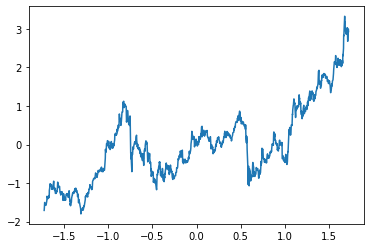

In [18]:
stock_data = np.loadtxt('SBER.ME.csv', delimiter=";", skiprows=1, usecols=(1, 5))
stock_data=scale(stock_data)
prices = stock_data[:, 1].reshape(-1, 1)
dates = stock_data[:, 0].reshape(-1, 1)
mpl.plot(dates[:, 0], prices[:, 0])
mpl.show()

In [22]:
stock_data = np.loadtxt('SBER.ME.csv', delimiter=";", skiprows=1, usecols=(1, 5))
stock_data=scale(stock_data)
prices = stock_data[:, 1]
dates = stock_data[:, 0]
stats.spearmanr(prices,dates)


SpearmanrResult(correlation=0.7527841349887879, pvalue=2.4480561372034343e-230)

In [ ]:
input = 1
output = 1
hidden = 75
layers = [('F', hidden), ('AF', 'tanh'), ('F', hidden), ('AF', 'tanh'), ('F', hidden), ('AF', 'tanh'), ('F', output)]
mlpr = ANNR([input], layers, batchSize = 256, maxIter = 20000, tol = 0.2, reg = 1e-4, verbose = True)

In [ ]:
holdDays = 5
totalDays = len(dates)
mlpr.fit(dates[0:(totalDays-holdDays)], prices[0:(totalDays-holdDays)])

Iter     1	      3.67428780 (Batch Size:   256)
Iter     2	      3.39110932 (Batch Size:   256)
Iter     3	      3.13014717 (Batch Size:   256)
Iter     4	      2.86642017 (Batch Size:   256)
Iter     5	      2.56830411 (Batch Size:   256)
Iter     6	      2.35786276 (Batch Size:   256)
Iter     7	      2.06802220 (Batch Size:   256)
Iter     8	      1.80732822 (Batch Size:   256)
Iter     9	      1.65007782 (Batch Size:   256)
Iter    10	      1.49760044 (Batch Size:   256)
Iter    11	      1.30016582 (Batch Size:   256)
Iter    12	      1.17455852 (Batch Size:   256)
Iter    13	      1.02236601 (Batch Size:   256)
Iter    14	      0.92769769 (Batch Size:   256)
Iter    15	      0.79235054 (Batch Size:   256)
Iter    16	      0.76440964 (Batch Size:   256)
Iter    17	      0.68120631 (Batch Size:   256)
Iter    18	      0.59255949 (Batch Size:   256)
Iter    19	      0.56399190 (Batch Size:   256)
Iter    20	      0.50905014 (Batch Size:   256)
Iter    21	      0.47581320 (Batch Size:

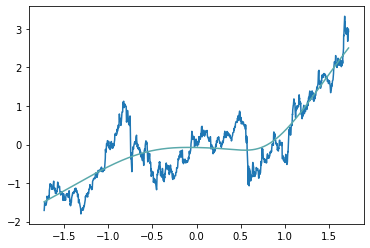

In [ ]:
pricePredict = mlpr.predict(dates)
mpl.plot(dates, prices)
mpl.plot(dates, pricePredict, c='#5aa9ab')
mpl.show()

In [ ]:
input2 = 1
output2 = 1
hidden2 = 75
layers = [('F', hidden2), ('AF', 'tanh'), ('F', hidden2), ('AF', 'tanh'), ('F', hidden2), ('AF', 'tanh'), ('F', output2)]
mlpr2 = ANNR([input2], layers, batchSize = 256, maxIter = 20000, tol = 0.1, reg = 1e-4, verbose = True)

In [ ]:
holdDays = 5
totalDays = len(dates)
mlpr2.fit(dates[0:(totalDays-holdDays)], prices[0:(totalDays-holdDays)])

Iter     1	      1.27046933 (Batch Size:   256)
Iter     2	      1.17707825 (Batch Size:   256)
Iter     3	      0.99724827 (Batch Size:   256)
Iter     4	      0.81016663 (Batch Size:   256)
Iter     5	      0.72801372 (Batch Size:   256)
Iter     6	      0.62817208 (Batch Size:   256)
Iter     7	      0.52793024 (Batch Size:   256)
Iter     8	      0.51684240 (Batch Size:   256)
Iter     9	      0.46512120 (Batch Size:   256)
Iter    10	      0.41890427 (Batch Size:   256)
Iter    11	      0.37474226 (Batch Size:   256)
Iter    12	      0.41909165 (Batch Size:   256)
Iter    13	      0.39388662 (Batch Size:   256)
Iter    14	      0.39753407 (Batch Size:   256)
Iter    15	      0.41170048 (Batch Size:   256)
Iter    16	      0.38165737 (Batch Size:   256)
Iter    17	      0.36884879 (Batch Size:   256)
Iter    18	      0.36689439 (Batch Size:   256)
Iter    19	      0.40160647 (Batch Size:   256)
Iter    20	      0.41418688 (Batch Size:   256)
Iter    21	      0.39940788 (Batch Size:

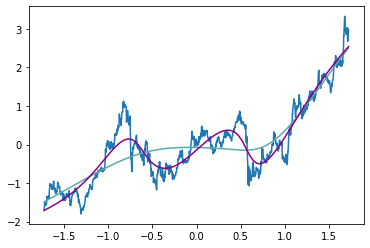

In [ ]:
pricePredict2 = mlpr2.predict(dates)
mpl.plot(dates, prices)
mpl.plot(dates, pricePredict, c='#5aa9ab')
mpl.plot(dates, pricePredict2, c='#8B008B')
mpl.show()

In [ ]:
input3 = 1
output3 = 1
hidden3 = 100
layers = [('F', hidden3), ('AF', 'tanh'), ('F', hidden3), ('AF', 'tanh'), ('F', hidden3), ('AF', 'tanh'), ('F', output3)]
mlpr3 = ANNR([input3], layers, batchSize = 256, maxIter = 20000, tol = 0.075, reg = 1e-4, verbose = True)

In [ ]:
holdDays = 5
totalDays = len(dates)
mlpr3.fit(dates[0:(totalDays-holdDays)], prices[0:(totalDays-holdDays)])

Iter     1	      1.09570326 (Batch Size:   256)
Iter     2	      0.86277456 (Batch Size:   256)
Iter     3	      0.76524009 (Batch Size:   256)
Iter     4	      0.59935945 (Batch Size:   256)
Iter     5	      0.52203609 (Batch Size:   256)
Iter     6	      0.42754013 (Batch Size:   256)
Iter     7	      0.44247262 (Batch Size:   256)
Iter     8	      0.43901703 (Batch Size:   256)
Iter     9	      0.40152502 (Batch Size:   256)
Iter    10	      0.43493954 (Batch Size:   256)
Iter    11	      0.42905919 (Batch Size:   256)
Iter    12	      0.39611526 (Batch Size:   256)
Iter    13	      0.40263821 (Batch Size:   256)
Iter    14	      0.38596885 (Batch Size:   256)
Iter    15	      0.39252454 (Batch Size:   256)
Iter    16	      0.41537089 (Batch Size:   256)
Iter    17	      0.40857570 (Batch Size:   256)
Iter    18	      0.39711175 (Batch Size:   256)
Iter    19	      0.40476450 (Batch Size:   256)
Iter    20	      0.41384860 (Batch Size:   256)
Iter    21	      0.40367982 (Batch Size:

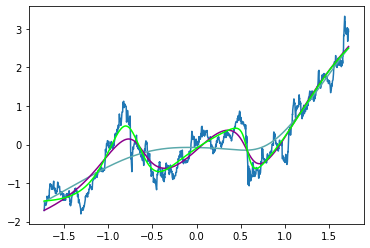

In [ ]:
pricePredict3 = mlpr3.predict(dates)
mpl.plot(dates, prices)
mpl.plot(dates, pricePredict, c='#5aa9ab')
mpl.plot(dates, pricePredict2, c='#8B008B')
mpl.plot(dates, pricePredict3, c='#00FF00')
mpl.show()

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import scipy.stats as sps
from scipy.optimize import curve_fit
from numpy import exp
from google.colab import files
from sklearn.preprocessing import scale
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


coefficient of determination: 0.7834945033415889
intercept: -13148032.724569306
coefficients: [ 0.00000000e+00  9.06481675e+02 -2.08316310e-02  1.59573460e-07]


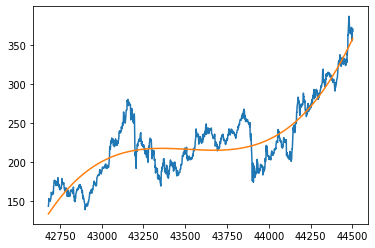

In [13]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

#Построим график данных акций
stock_data = np.loadtxt('SBER.ME.csv', delimiter=";", skiprows=1, usecols=(1, 5))
prices = stock_data[:, 1].reshape(-1, 1)
dates = stock_data[:, 0].reshape(-1, 1)
plt.plot(dates[:, 0], prices[:, 0])


prices = stock_data[:, 1]
dates = stock_data[:, 0].reshape(-1, 1)
#Преобразование входных данных 
transformer = PolynomialFeatures(degree=3, include_bias=True)
transformer.fit(dates)
x_ = transformer.transform(dates)
model = LinearRegression().fit(x_, prices)

r_sq = model.score(x_, prices)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)
y_pred = model.predict(x_)
plt.plot(dates,y_pred)
plt.show()
